### **Desafío guiado - Dimensionalidad y Agrupación I**

### **`Introducción`**

- Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality Item Pool, aplicados a 2800 individuos. 
- El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características de:
    - Amabilidad
    - Escrupulosidad
    - Extroversión
    - Neuroticismo
    - Apertura
    
- Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
    - `1`: No me representa para nada.
    - `2`: No me representa.
    - `3`: Algunas cosas no me representan.
    - `4`: Algunas cosas me representan.
    - `5`: Me representa.
    - `6`: Me representa completamente.
    
- Las 25 preguntas son:
    - `A1`: Soy indiferente a los sentimientos de otros.
    - `A2`: Me preocupo del bienestar de otros.
    - `A3`: Sé cómo confortar a otros.
    - `A4`: Me agradan los niños.
    - `A5`: Hago sentir tranquila a la gente.
    - `C1`: Soy exacto en mi trabajo.
    - `C2`: Sigo con mis tareas hasta que todo esté perfecto.
    - `C3`: Hago cosas siguiendo un plan.
    - `C4`: Hago cosas con el mínimo esfuerzo.
    - `C5`: Pierdo mi tiempo.
    - `E1`: No hablo mucho con las personas.
    - `E2`: Me es difícil acercarme a otros.
    - `E3`: Sé cómo cautivar a la gente.
    - `E4`: Hago amigos de forma fácil.
    - `E5`: Puedo tomar el cargo de las cosas.N1 Me enojo con facilidad.
    - `N2`: Me irrito con facilidad.
    - `N3`: Tengo cambios de humor frecuentes.
    - `N4`: Usualmente me siento melancólico.
    - `N5`: Entró en pánico con facilidad.
    - `O1`: Estoy lleno de ideas.
    - `O2`: Evito leer material difícil.
    - `O3`: Tiendo a llevar la conversación a niveles más altos.
    - `O4`: Dedico tiempo a la reflexión de cosas.
    - `O5`: No profundizaré sobre una materia específica.
    
- Se registraron una serie de covariables sobre características demográficas de los encuestados:
    - `gender`: Masculino = 1, Femenino = 2.
    - `education`: 
        - 1 = Educación Media Incompleta, 
        - 2 = Educación Media Completa, 
        - 3 = Educación Universitaria Incompleta, 
        - 4 = Educación Universitaria Completa, 
        - 5 = Estudios de Postgrado.
    - `age`: Edad en Años.
    
- Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

### **`Desafío 1: Importar librerias y carga de archivos`**

- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
- Solicite las primeras 5 observaciones con `head`.

In [14]:
# Utiliza esta celda para importar los módulos requeridos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import factor_analyzer as fact
import missingno as msgno
import warnings

warnings.filterwarnings(action='ignore')
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (8,6) # Tamaño graficos
plt.rcParams["figure.dpi"] = 100 # Resolucion graficos

In [9]:
# Cargar set de datos

df = pd.read_csv("bfi.csv")

# Explorar las primeras 5 observaciones

df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### **`Desafío 2: Preprocesamiento`**

- Elimine las columnas redundantes de la base, tal como `Unnamed: 0`.

In [10]:
 # Utiliza esta celda para eliminar Unnamed: 0

df = df.drop('Unnamed: 0', axis = 1)

#tips.drop(columns = ["tip", "smoker", "weather"], errors = "ignore").head()
df.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [17]:
df.shape

(2800, 28)

- Analice el patrón de datos perdidos con `missingno`.

In [5]:
df.isna().sum()

A1            16
A2            27
A3            26
A4            19
A5            16
C1            21
C2            24
C3            20
C4            26
C5            16
E1            23
E2            16
E3            25
E4             9
E5            21
N1            22
N2            21
N3            11
N4            36
N5            29
O1            22
O2             0
O3            28
O4            14
O5            20
gender         0
education    223
age            0
dtype: int64

<AxesSubplot:>

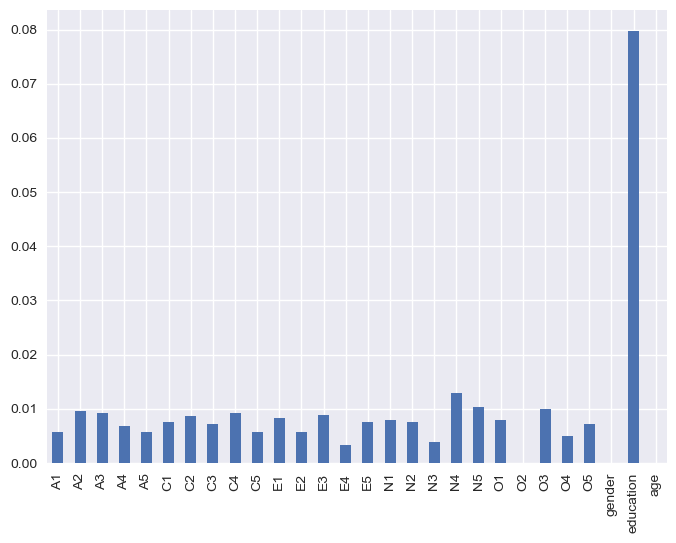

In [15]:
df.isna().mean().plot(kind='bar')

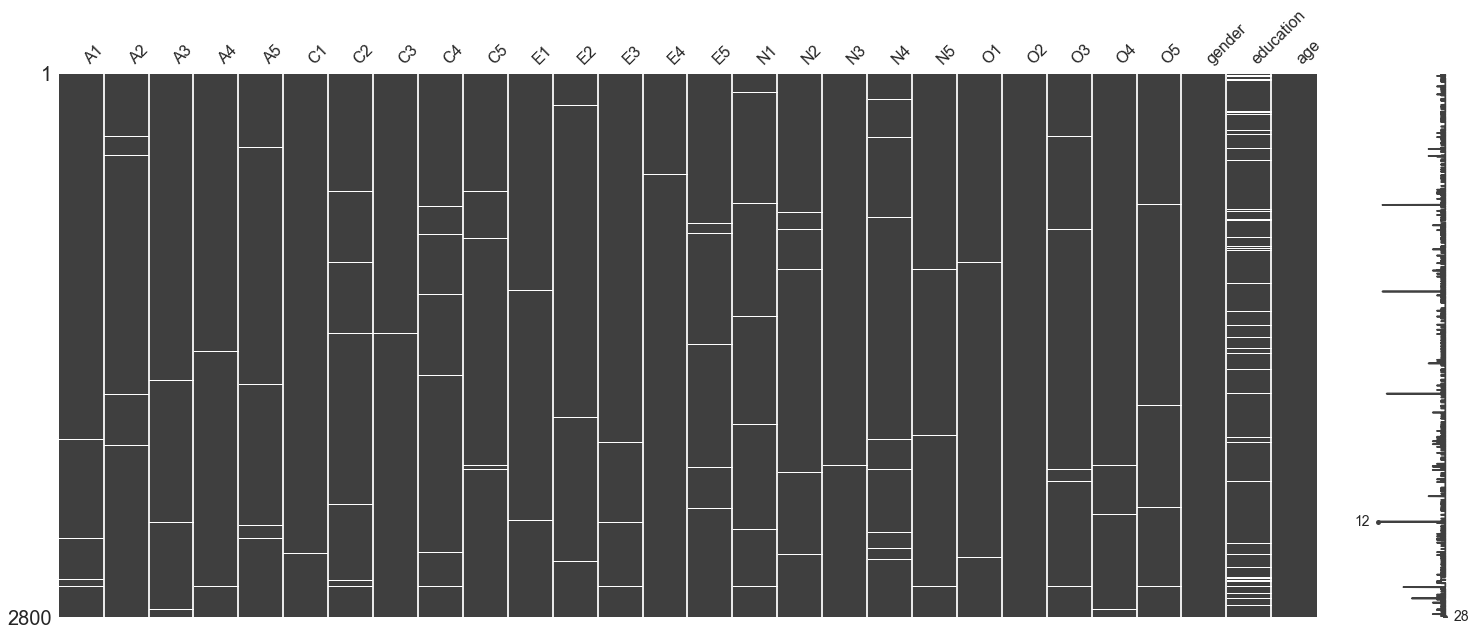

In [4]:
# Utiliza esta celda para explorar los datos perdidos

msgno.matrix(df)

- Comente cuáles son las principales variables con mayores tasas de valores perdidos.

**Respuesta:**
La variable que tiene mas valores perdidos es education

- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [16]:
# Utiliza esta celda para almacenar el set sin datos perdidos.

df_clean = df.dropna()
df_clean.shape

(2236, 28)

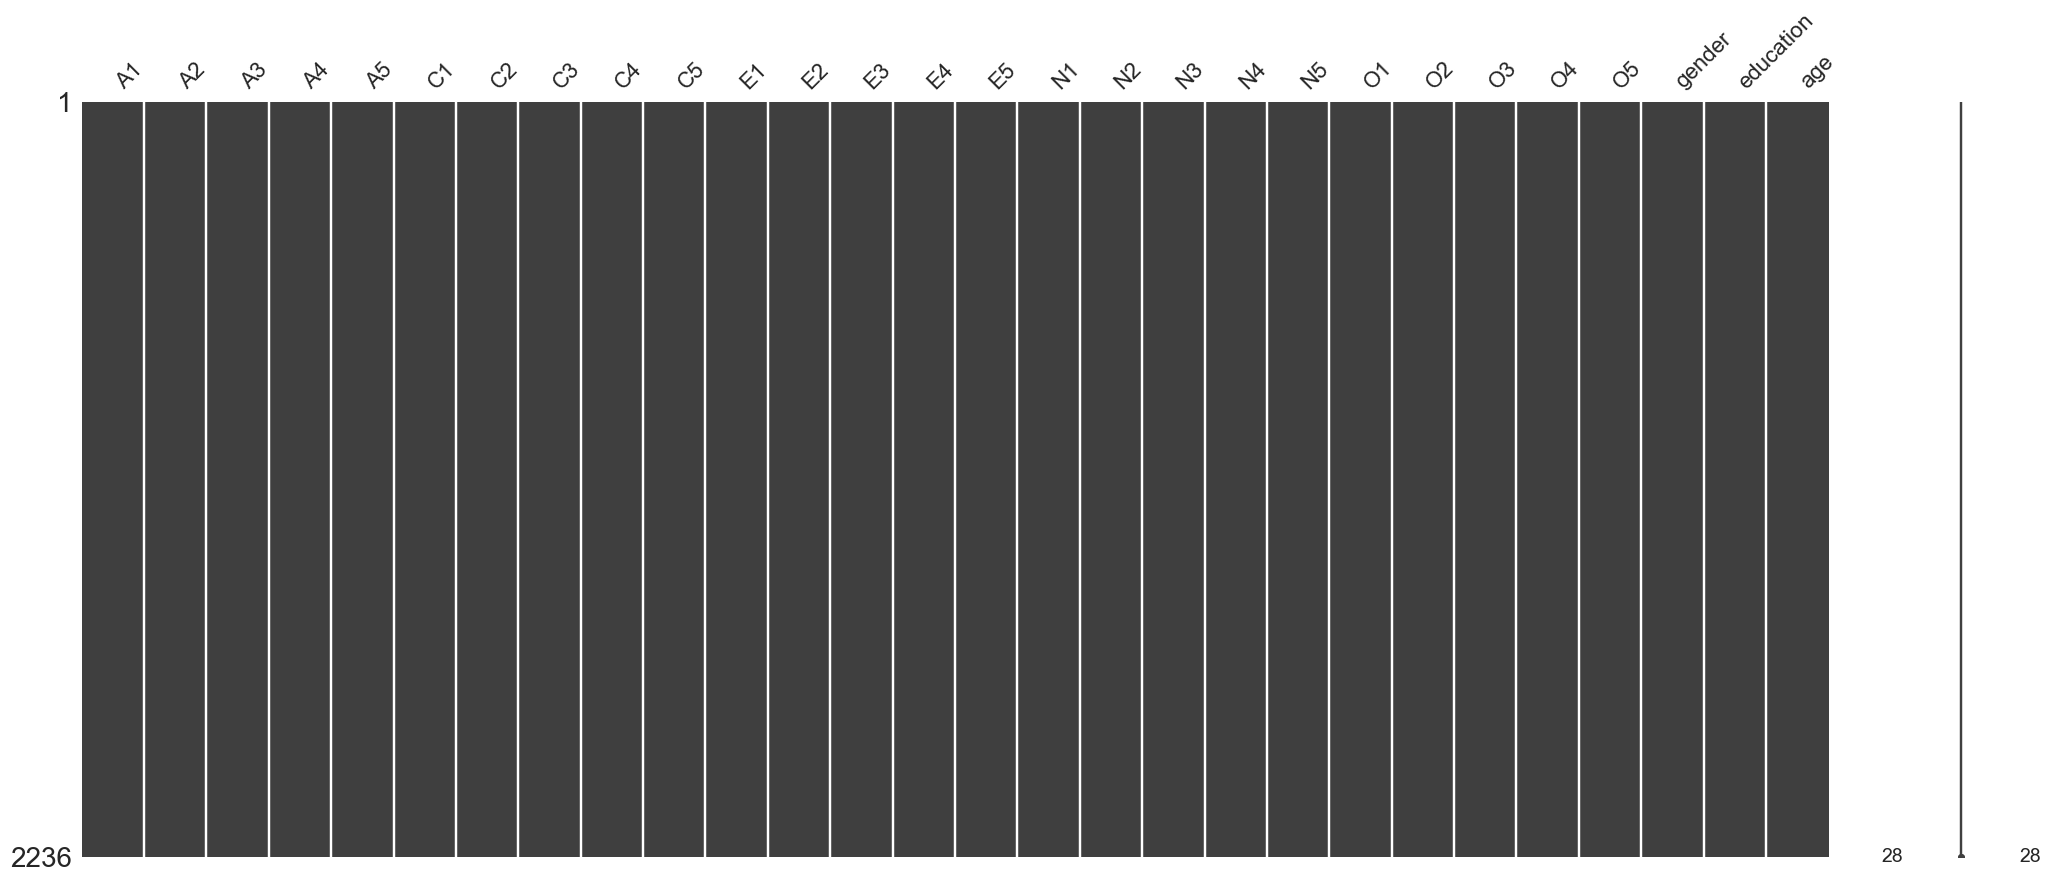

In [18]:
#Visualmente podemos ver que ya no existen valores nulos o perdidos

msgno.matrix(df_clean);

### **`Desafío 3: Descripción`**

- Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.

In [25]:
# Utiliza esta celda para generar el subset a partir del set sin datos perdidos. Tip: Puedes usar slice de la forma A1:O5

                    #filas, #columnas
df_preguntas = df_clean.loc[:, 'A1':'O5']

df_preguntas.shape

(2236, 25)

In [26]:
df_preguntas.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.

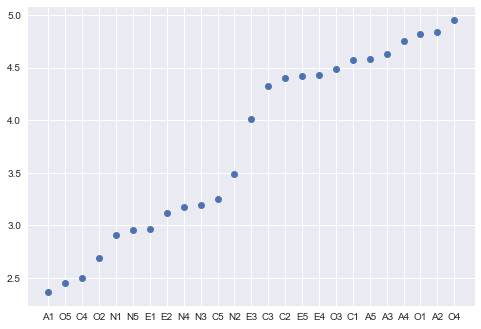

In [8]:
# Utiliza esta celda para generar el plot solicitado. Tip: Puedes aplicar mean() al df completo y ordenar sus valores

#grafico(df.medias.ordenado, punto)

plt.plot(df_preguntas.mean().sort_values(), "o");

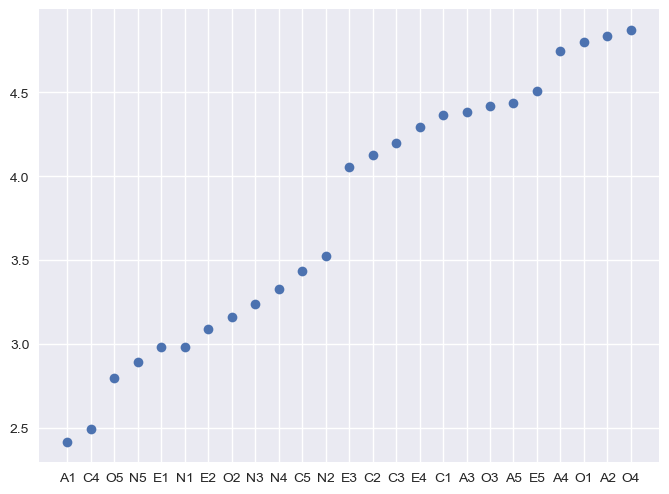

In [30]:
df_treinta = df_clean.loc[df.age == 30]
df_treinta_preguntas = df_treinta.loc[:, 'A1':'O5']
plt.plot(df_treinta_preguntas.mean().sort_values(), "o")

- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.

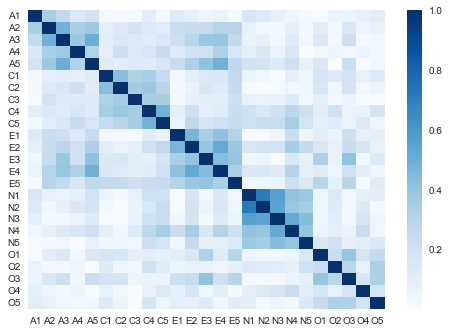

In [9]:
# Utiliza esta celda para generar el heatmap solicitado

sns.heatmap(df_preguntas.corr().abs(), cmap="Blues", annot = False)

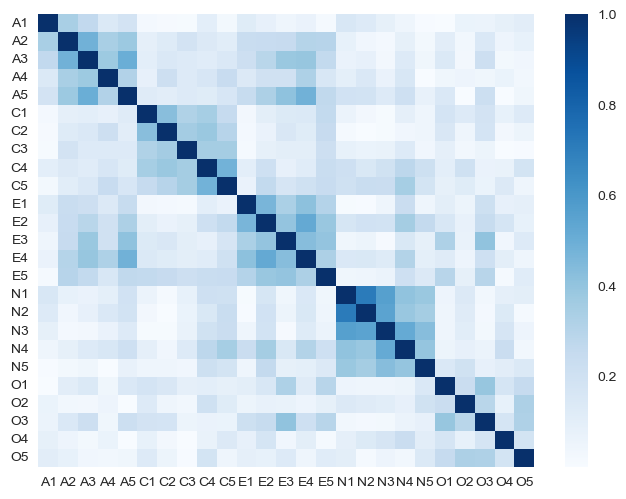

In [33]:
sns.heatmap(np.abs(df_preguntas.corr()), cmap="Blues", annot = False);

- Comente sobre los principales patrones de correlación entre las preguntas de la batería.

**Respuesta**

Se puede apreciar que existe una correlación entre las preguntas que son de una misma sección.

### **`Desafío 4: Extracción de factores`**

- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin.

In [37]:
# Utiliza esta celda para realizar la prueba de esferacidad de Barlett
# Este pvalor tiene que ser menor a 0.05 para rechazar la hipotesis nula (para rechazar hay que tener pvalor pequeños)

estadistico, pvalor = fact.calculate_bartlett_sphericity(df_preguntas)

estadistico, pvalor

(16509.673550497166, 0.0)

In [38]:
# Utiliza esta celda para realizar la prueba KMO

kmo_variable, kmo_global = fact.calculate_kmo(df_preguntas)
pd.DataFrame({'variable':df_preguntas.columns, 'kmo':kmo_variable}).sort_values('kmo')


,variable,kmo
0,A1,0.737832
24,O5,0.758049
15,N1,0.778127
16,N2,0.778453
23,O4,0.781118
21,O2,0.783811
6,C2,0.788420
8,C4,0.823646
22,O3,0.833744
1,A2,0.834263


In [39]:
kmo_global

0.8468295031833755

**Comentarios**

Si es posible realizar un análisis factorial ya que la matriz de correlación no es una matriz de identidad (pvalor de la 
prueba de esferacidad de Barlett es menor a 0.05), y las pruebas KMO nos entrega un KMO general mayor a 0.7.

- Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

In [40]:
# Utiliza esta celda para generar los factores latentes y graficar sus valores propios

factorize = fact.FactorAnalyzer(n_factors=10)

#Implementacion del análisis factorial
factorize.fit(df_preguntas)

#Extracción de los valores propios (eigenvalues)
factor_screeplot = factorize.get_eigenvalues()[0]

factor_screeplot

array([5.06851622, 2.7624793 , 2.152623  , 1.89233295, 1.51753291,
       1.07882932, 0.83090573, 0.80450025, 0.7140883 , 0.7015381 ,
       0.6808421 , 0.64897347, 0.63125633, 0.58803197, 0.5659652 ,
       0.54483958, 0.51993349, 0.49386855, 0.48273618, 0.44250032,
       0.42887063, 0.40709741, 0.38887531, 0.38476259, 0.2681008 ])

Text(0.5, 1.0, 'Scree plot')

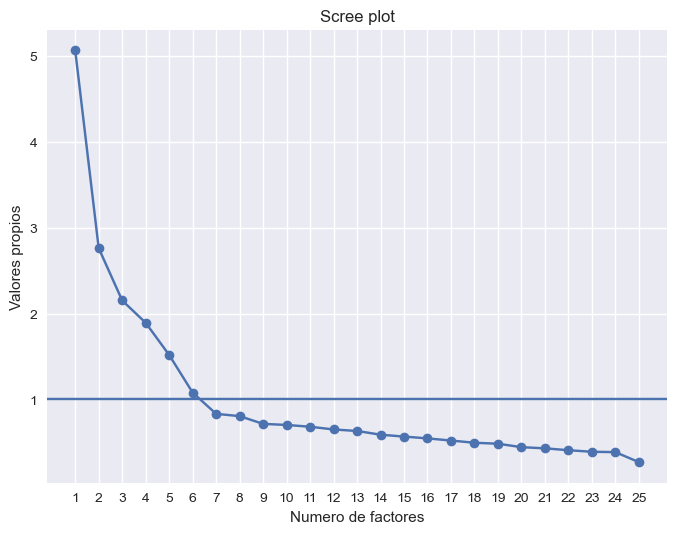

In [41]:
#Graficamos los eigenvalues contra la cantidad de dimensiones estimables

plt.plot(range(1, len(factor_screeplot)+1), factor_screeplot, "o-")
plt.xlabel("Numero de factores")
plt.ylabel("Valores propios")
plt.xticks(range(1, len(factor_screeplot)+1))

#Criterio de corte
plt.axhline(1)

#Title
plt.title("Scree plot")

- Refactoriza el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas $\lambda$ del modelo e identifique qué ítems están asociados a cada factor.

Primera forma:

In [43]:
factorize_6 = fact.FactorAnalyzer(n_factors=6) 

factorize_6.fit(df_preguntas)

factorize_6_loadings = pd.DataFrame(
    factorize_6.loadings_,
    columns=[f"Factor {i}" for i in range (1,7)],
    index=df_preguntas.columns
)

factorize_6_loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.044246,0.087326,0.106308,0.147752,-0.623217,0.174737
A2,0.113686,0.179650,0.058154,-0.025989,0.639541,-0.039742
A3,0.004894,0.269066,0.025713,0.020732,0.489930,0.186803
A4,-0.047633,0.129251,0.190336,0.182471,0.324844,0.060074
A5,-0.164942,0.323591,-0.013865,0.029803,0.314084,0.285151
C1,0.035324,-0.041623,0.588791,-0.138188,-0.076776,-0.002966
C2,0.081360,-0.121824,0.737840,-0.012264,-0.039509,0.038298
C3,0.015704,-0.077021,0.608281,0.055442,0.043901,-0.104278
C4,0.025907,0.020554,-0.671731,0.116555,-0.140572,0.480149
C5,0.153253,-0.087395,-0.555096,-0.065150,-0.003403,0.236204


In [44]:
factorize_6_loadings = factorize_6_loadings.applymap(lambda x: np.where(x < 0.4, ' ', round(x, 2)))

factorize_6_loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,,,,,,
A2,,,,,0.64,
A3,,,,,0.49,
A4,,,,,,
A5,,,,,,
C1,,,0.59,,,
C2,,,0.74,,,
C3,,,0.61,,,
C4,,,,,,0.48
C5,,,,,,


Segunda forma:

In [44]:
# Utiliza esta celda para generar los nuevos factores, extraer sus cargas, y mostrarlas en un dataframe con escala de colores

factorize_6 = fact.FactorAnalyzer(n_factors=6)

#Implementacion del análisis factorial
factorize_6.fit(df_preguntas)

cargas = pd.DataFrame(
    factorize_6.loadings_,
    columns=[f"Factor {i}" for i in range (1,7)],
    index=df_preguntas.columns
)

cargas[cargas > .4].fillna(0).round(3).style.format("{:.2f}").background_gradient(cmap="Purples").applymap(
    lambda x: "color: transparent" if x == 0 else ""
)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.00,0.00,0.00,0.00,0.00,0.00
A2,0.00,0.00,0.00,0.00,0.64,0.00
A3,0.00,0.00,0.00,0.00,0.49,0.00
A4,0.00,0.00,0.00,0.00,0.00,0.00
A5,0.00,0.00,0.00,0.00,0.00,0.00
C1,0.00,0.00,0.59,0.00,0.00,0.00
C2,0.00,0.00,0.74,0.00,0.00,0.00
C3,0.00,0.00,0.61,0.00,0.00,0.00
C4,0.00,0.00,0.00,0.00,0.00,0.48
C5,0.00,0.00,0.00,0.00,0.00,0.00


**Comente sobre qué significa cada factor construído**


-Factor 1 : Neuroticismo
-Factor 2 : Extroversión
-Factor 3 : Escrupulosidad
-Factor 4 : Apertura
-Factor 5 : Amabilidad
-Factor 6 : Pereza

 

### **`Desafío 5: Modelación de factores`**

- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con `kdplot`.

In [47]:
# Utiliza esta celda para extraer los puntajes y graficar su densidad

puntajes = pd.DataFrame(factorize_6.transform(df_preguntas), columns=[f"Factor_{i}" for i in range (1,7)])

puntajes

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786
...,...,...,...,...,...,...
2231,0.602248,0.834597,0.184898,1.169762,-0.399820,1.404198
2232,-1.558568,1.657646,-0.726490,-0.527137,-1.180325,-0.499578
2233,0.744488,-0.254111,0.728326,-1.054909,-0.899845,-0.480255
2234,0.129721,1.003899,-0.166139,-0.762935,-2.139689,-0.363081


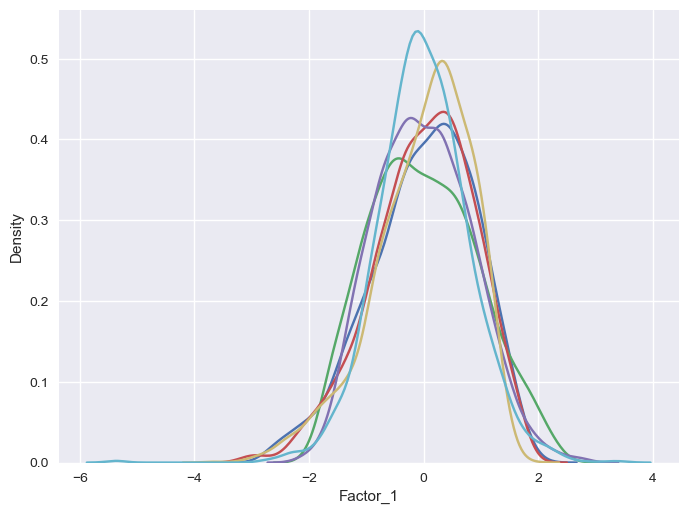

In [48]:
for c in puntajes.columns:
    sns.kdeplot(puntajes[c], label=c)

- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
$$
y_i = \beta_0 + \beta_{gender} \cdot \text{gender}_i + \beta_{education} \cdot \text{education}_i + \beta_{age} \cdot \text{age}_i + \epsilon_i
$$

- $y$: Factor a modelar.

In [88]:
df_clean.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


In [89]:
df_clean.reset_index()

,index,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
1,7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
2,10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
3,14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
4,22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2792,5.0,5.0,5.0,6.0,5.0,6.0,6.0,2.0,4.0,...,3.0,4.0,4.0,5,5.0,4.0,4.0,2,3.0,22
2232,2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,...,5.0,6.0,6.0,1,4.0,5.0,2.0,2,4.0,24
2233,2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2234,2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [90]:
df_clean.reset_index(drop=True)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,5.0,5.0,5.0,6.0,5.0,6.0,6.0,2.0,4.0,5.0,...,3.0,4.0,4.0,5,5.0,4.0,4.0,2,3.0,22
2232,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,5.0,6.0,6.0,1,4.0,5.0,2.0,2,4.0,24
2233,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2234,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [84]:
# Utiliza esta celda para entrenar los modelos solicitados. Se debe hacer un modelo paara cada factor.

df_modelo = pd.concat([df_clean.reset_index(drop=True), puntajes], axis=1)


df_modelo["gender"] = df_modelo["gender"].replace([1,2], [1,0])

df_modelo.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,1.0,0,3.0,21,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1,2.0,19,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,1,1.0,21,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,5.0,1,1.0,17,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,1,5.0,68,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786


In [91]:
cor = df_modelo.loc[:,['Factor_1','Factor_2','Factor_3','Factor_4','Factor_5','Factor_6','gender','education','age',]].corr()
cor

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,gender,education,age
Factor_1,1.000000,-0.395023,0.501535,-0.128547,0.415890,0.182672,-0.113539,0.001042,0.071843
Factor_2,-0.395023,1.000000,-0.244961,0.032608,-0.173622,0.303334,-0.074687,-0.033783,-0.109764
Factor_3,0.501535,-0.244961,1.000000,-0.211706,0.346168,0.228632,-0.095701,0.024054,0.085105
Factor_4,-0.128547,0.032608,-0.211706,1.000000,0.002671,-0.108129,-0.108381,-0.131073,-0.076730
Factor_5,0.415890,-0.173622,0.346168,0.002671,1.000000,0.428976,-0.249343,0.047977,0.120559
Factor_6,0.182672,0.303334,0.228632,-0.108129,0.428976,1.000000,-0.047531,-0.000588,-0.059849
gender,-0.113539,-0.074687,-0.095701,-0.108381,-0.249343,-0.047531,1.000000,-0.005730,-0.046975
education,0.001042,-0.033783,0.024054,-0.131073,0.047977,-0.000588,-0.005730,1.000000,0.249114
age,0.071843,-0.109764,0.085105,-0.076730,0.120559,-0.059849,-0.046975,0.249114,1.000000


Para una sola variable frente a las otras variables:

In [92]:
cor['education']

Factor_1     0.001042
Factor_2    -0.033783
Factor_3     0.024054
Factor_4    -0.131073
Factor_5     0.047977
Factor_6    -0.000588
gender      -0.005730
education    1.000000
age          0.249114
Name: education, dtype: float64

<AxesSubplot:>

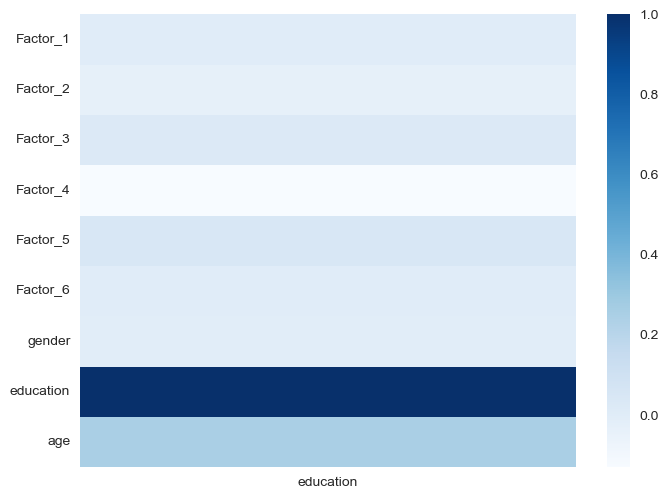

In [93]:
sns.heatmap(cor.loc[:, ['education']], cmap='Blues')

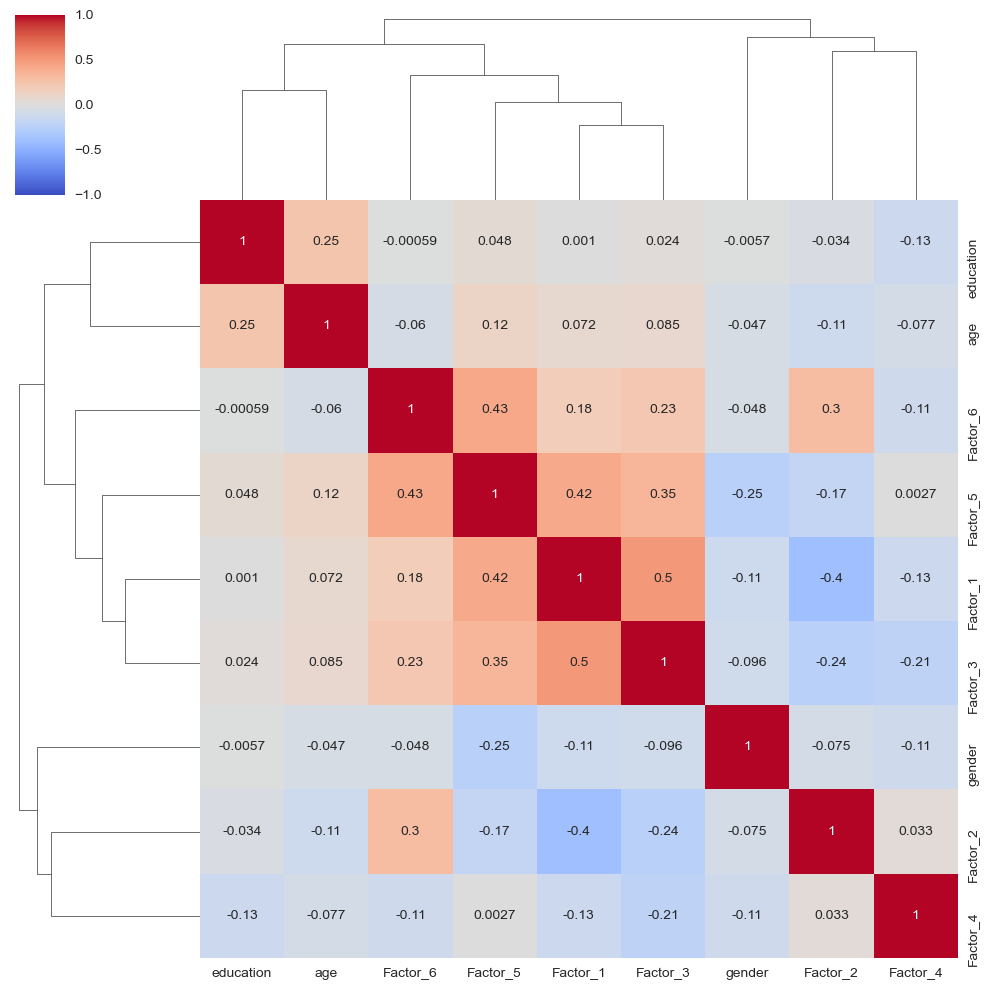

In [94]:
sns.clustermap(cor, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [95]:
for i in ['Factor_1','Factor_2','Factor_3','Factor_4','Factor_5','Factor_6']:
    print(i)
    print(smf.ols(i + "~ gender + education + age", df_modelo).fit().summary().tables[1])

Factor_1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0640      0.073     -0.875      0.382      -0.207       0.079
gender        -0.2157      0.041     -5.252      0.000      -0.296      -0.135
education     -0.0143      0.018     -0.797      0.425      -0.049       0.021
age            0.0061      0.002      3.272      0.001       0.002       0.010
Factor_2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3591      0.074      4.825      0.000       0.213       0.505
gender        -0.1592      0.042     -3.810      0.000      -0.241      -0.077
education     -0.0053      0.018     -0.294      0.769      -0.041       0.030
age           -0.0098      0.002     -5.164      0.000      -0.014      -0.006
Factor_3
                 coef    